In [126]:
!pip install opendatasets --quiet
!pip install jovian --quiet

In [127]:
#Importing important libraries
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
import jovian
import os
import pandas as pd
%matplotlib inline

In [128]:
#Some settings for better plotting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [129]:
!unzip /content/Exo_data.zip

Archive:  /content/Exo_data.zip
replace exoplanets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [130]:
exo_df = pd.read_csv('exoplanets.csv')

In [131]:
exo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2359 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [132]:
#important sklearn packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import *
import lightgbm as lgb
import xgboost as xgb

In [133]:
exo_df.head(10)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,11.094321,2.040000e-05,-2.040000e-05,171.201160,0.001410,-0.001410,0.538,0.030,-0.428,4.59450,0.06100,-0.06100,1520.0,24.2,-24.2,3.90,1.27,-0.42,835.0,NaN,NaN,114.81,112.85,-36.70,66.5,1.0,q1_q17_dr25_tce,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160.0,NaN,NaN,427.65,420.33,-136.70,40.2,2.0,q1_q17_dr25_tce,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,-0.004610,0.755,0.212,-0.523,2.42900,0.16500,-0.16500,227.0,16.8,-16.8,1.59,0.52,-0.17,1360.0,NaN,NaN,807.74,793.91,-258.20,15.0,3.0,q1_q17_dr25_tce,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,7.361790,2.130000e-05,-2.130000e-05,132.250530,0.002530,-0.002530,1.169,7.133,-0.044,5.02200,0.13600,-0.13600,234.0,5.8,-5.8,39.21,6.45,-9.67,1342.0,NaN,NaN,767.22,349.28,-365.49,47.7,1.0,q1_q17_dr25_tce,6227.0,111.0,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,-0.000517,0.052,0.262,-0.0

In [134]:
exo_df.isna().sum()
#we will exclude the columns with majority NaN values for bettter predictions

,0
kepid,0
kepoi_name,0
kepler_name,7205
koi_disposition,0
koi_pdisposition,0
koi_score,1510
koi_fpflag_nt,0
koi_fpflag_ss,0
koi_fpflag_co,0
koi_fpflag_ec,0


In [135]:
exo_df.drop(columns=['koi_teq_err1', 'koi_teq_err2', 'kepler_name', 'kepoi_name', 'kepid', 'koi_tce_delivname', 'koi_fpflag_co', 'koi_score'], inplace=True)
#including koi_score in my dataset can be considered cheating, as koi_score is itself derived from the same processes that assign the disposition labels (CONFIRMED, FALSE POSITIVE, etc.).

In [136]:
exo_df.dropna(inplace=True)

In [137]:
exo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8744 entries, 0 to 9563
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    8744 non-null   object 
 1   koi_pdisposition   8744 non-null   object 
 2   koi_fpflag_nt      8744 non-null   int64  
 3   koi_fpflag_ss      8744 non-null   int64  
 4   koi_fpflag_ec      8744 non-null   int64  
 5   koi_period         8744 non-null   float64
 6   koi_period_err1    8744 non-null   float64
 7   koi_period_err2    8744 non-null   float64
 8   koi_time0bk        8744 non-null   float64
 9   koi_time0bk_err1   8744 non-null   float64
 10  koi_time0bk_err2   8744 non-null   float64
 11  koi_impact         8744 non-null   float64
 12  koi_impact_err1    8744 non-null   float64
 13  koi_impact_err2    8744 non-null   float64
 14  koi_duration       8744 non-null   float64
 15  koi_duration_err1  8744 non-null   float64
 16  koi_duration_err2  8744 non-n

In [138]:
exo_df = exo_df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData'})
exo_df['ExoplanetCandidate'] = exo_df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
exo_df['ExoplanetConfirmed'] = exo_df['ExoplanetArchiveDisposition'].apply(lambda x: 1 if x == 'CONFIRMED' else 0.5 if x == 'CANDIDATE' else 0 )

In [139]:
exo_df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,ExoplanetCandidate,ExoplanetConfirmed
count,8744.000000,8744.000000,8744.000000,8744.000000,8.744000e+03,8.744000e+03,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8.744000e+03,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8.744000e+03,8.744000e+03,8.744000e+03,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000
mean,0.183211,0.242681,0.125000,56.080618,1.840001e-03,-1.840001e-03,164.563271,0.009300,-0.009300,0.718315,1.972656,-0.330185,5.521409,0.317958,-0.317958,2.355786e+04,119.731313,-119.731313,103.932190,17.554190,-34.067518,1087.503545,7.237635e+03,3.387183e+03,-3.775831e+03,268.401315,1.240279,5698.246569,144.103500,-161.354758,4.310223,0.120733,-0.140411,1.704566,0.352884,-0.379933,292.075061,43.828259,14.273969,0.517383,0.392612
std,4.982739,0.428728,0.330738,117.385280,7.280915e-03,7.280915e-03,66.476457,0.021662,0.021662,3.176618,9.464462,1.227048,6.318934,0.641691,0.641691,8.188051e+04,4200.730698,4200.730698,3151.780687,394.917236,1224.205613,839.110779,1.590966e+05,5.120450e+04,8.891809e+04,811.988767,0.654931,797.953594,47.284063,72.986448,0.431557,0.132813,0.082936,5.682429,0.906364,1.810943,4.772918,3.599786,1.343509,0.499726,0.419236
min,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.570000e-01,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.167000,0.000000,-20.200000,4.500000e+00,0.000000,-389000.000000,0.140000,0.000000,-77200.000000,92.000000,2.000000e-02,0.000000e+00,-5.600031e+06,1.600000,1.000000,2661.000000,0.000000,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-103.825000,279.852720,36.577381,6.966000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.667824,5.290000e-06,-2.460000e-04,132.729408,0.001200,-0.010000,0.197000,0.040000,-0.447000,2.437750,0.050275,-0.331000,1.610000e+02,9.475000,-47.600000,1.400000,0.240000,-2.032500,551.000000,2.181500e+01,1.110000e+01,-2.944275e+02,12.400000,1.000000,5296.000000,105.000000,-197.000000,4.215750,0.043000,-0.195000,0.826000,0.125750,-0.247000,288.670237,40.805911,13.474000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,8.970985,3.320000e-05,-3.320000e-05,136.910235,0.004020,-0.004020,0.540500,0.192000,-0.207000,3.778935,0.137500,-0.137500,4.220000e+02,20.200000,-20.200000,2.400000,0.510000,-0.310000,884.000000,1.446250e+02,7.821500e+01,-4.389000e+01,23.650000,1.000000,5757.000000,157.000000,-159.000000,4.439000,0.070000,-0.127000,0.997000,0.246000,-0.111000,292.285005,43.703989,14.534000,1.000000,0.500000
75%,0.000000,0.000000,0.000000,34.190033,2.460000e-04,-5.290000e-06,169.975942,0.010000,-0.001200,0.889000,0.378850,-0.045000,6.172000,0.331000,-0.050275,1.460000e+03,47.600000,-9.475000,14.872500,2.542500,-0.140000,1381.000000,8.595850e+02,5.304350e+02,-6.280000e+00,79.300000,1.000000,6109.000000,174.000000,-112.000000,4.544000,0.149000,-0.087000,1.346250,0.356000,-0.069000,295.900510,46.722135,15.318250,1.000000,1.000000
max,465.000000,1.000000,1.000000,1071.232624,1.570000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,20.200000,0.000000,1.540000e+06,389000.000000,0.000000,200346.000000,21600.000000,0.000000,14667.000000,1.094755e+07,3.617133e+06,0.000000e+00,9054.700000,8.000000,15896.000000,676.000000,0.000000,5.364000,1.472000,0.000000,180.013000

In [140]:
#Now we have converted the two categoric columns to numeric columns, so we can drop them
exo_df = exo_df.drop(columns=['ExoplanetArchiveDisposition','DispositionUsingKeplerData'])
#we can also drop Exoplanet_candidate column as it is basically the same column as Exoplanet_confirmed
exo_df = exo_df.drop(columns=['ExoplanetCandidate'])
# Filter the DataFrame to exclude 'CANDIDATE' rows, as we need a binary classification
exo_df = exo_df[exo_df['ExoplanetConfirmed'] != 0.5]

#Resetting the index for a clean DataFrame
exo_df.reset_index(drop=True, inplace=True)

exo_df

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,ExoplanetConfirmed
0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0
1,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0
2,0,1,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0.0
3,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1.0
4,0,0,0,11.094321,2.040000e-05,-2.040000e-05,171.201160,0.001410,-0.001410,0.538,0.030,-0.428,4.59450,0.06100,-0.06100,1520.0,24.2,-24.2,3.90,1.27,-0.42,835.0,114.81,112.85,-36.70,66.5,1.0,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6545,1,0,0,373.893980,1.660000e-02,-1.660000e-02,261.496800,0.034900,-0.034900,0.963,0.067,-0.658,27.66000,2.30000,-2.30000,730.0,52.4,-52.4,2.51,0.27,-0.24,206.0,0.42,0.16,-0.11,18.5,3.0,5263.0,157.0,-141.0,4.574,0.078,-0.052,0.699,0.074,-0.066,290.93597,47.290730,14.911,0.0
6546,0,0,1,8.589871,1.850000e-04,-1.850000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,176.40,152.77,-77.60,8.4,1.0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,0.0
6547,0,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1580.0,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,0.0
6548,0,0,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,104.0,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,0.0


<Axes: xlabel='ExoplanetConfirmed', ylabel='count'>

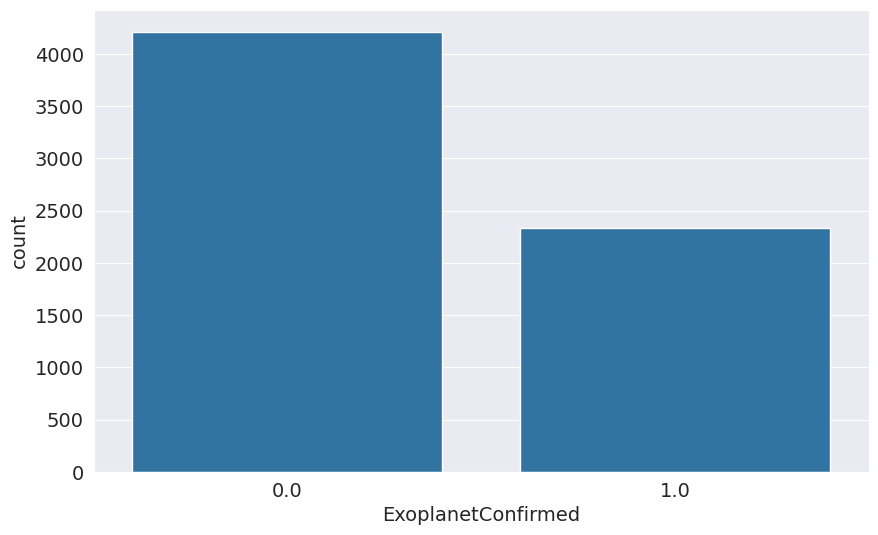

In [141]:
#Now we will see the two classes of the ExoplanetConfirmed column which is our target column
sns.countplot(x='ExoplanetConfirmed', data=exo_df)

In [142]:
train_df, test_df = train_test_split(exo_df, test_size=.30)

In [143]:
input_cols = train_df.columns.drop('ExoplanetConfirmed')
target_col = 'ExoplanetConfirmed'

In [144]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [145]:
train_inputs

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
135,0,0,0,4.583521,4.180000e-06,-4.180000e-06,169.973972,0.000733,-0.000733,0.0450,0.3190,-0.0450,2.70550,0.03210,-0.03210,3810.0,44.5,-44.5,5.39,1.60,-0.53,1038.0,274.98,239.18,-77.52,99.5,1.0,5815.0,157.0,-175.0,4.540,0.038,-0.212,0.877,0.260,-0.087,299.18686,41.742680,15.287
172,0,0,0,3.219815,5.530000e-06,-5.530000e-06,133.004060,0.001340,-0.001340,0.0600,0.4000,-0.0600,2.06420,0.03920,-0.03920,488.0,17.6,-17.6,1.69,0.11,-0.08,998.0,234.93,53.16,-39.02,30.5,3.0,5103.0,101.0,-101.0,4.562,0.032,-0.052,0.787,0.051,-0.039,291.63898,42.436321,15.599
5017,0,1,0,2.638433,3.560000e-07,-3.560000e-07,133.003946,0.000112,-0.000112,0.8630,0.1050,-0.0130,2.42989,0.00854,-0.00854,48500.0,126.0,-126.0,49.77,9.97,-15.00,1933.0,3299.02,1923.00,-1852.23,529.4,1.0,6502.0,155.0,-175.0,3.991,0.280,-0.120,1.753,0.351,-0.527,285.51840,41.660469,12.601
4074,0,0,0,3.172757,2.370000e-05,-2.370000e-05,133.989440,0.006760,-0.006760,0.0300,0.4260,-0.0300,5.40400,0.19300,-0.19300,313.0,12.3,-12.3,1.27,0.17,-0.10,966.0,206.07,98.17,-52.11,30.1,1.0,5058.0,184.0,-163.0,4.610,0.027,-0.082,0.739,0.097,-0.057,296.28696,44.022671,15.936
3688,0,1,0,2.637574,3.630000e-07,-3.630000e-07,131.575561,0.000125,-0.000125,1.1070,0.0470,-0.0670,5.96260,0.01100,-0.01100,170000.0,167.0,-167.0,76.02,21.10,-7.02,1242.0,563.22,471.84,-158.07,1471.6,1.0,5639.0,171.0,-188.0,4.509,0.036,-0.192,0.953,0.264,-0.088,293.66934,46.297459,15.902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,0,0,0,4.645382,6.140000e-06,-6.140000e-06,134.589390,0.001070,-0.001070,0.1540,0.2200,-0.1540,2.02710,0.03430,-0.03430,566.0,15.0,-15.0,1.33,0.08,-0.07,629.0,36.90,7.15,-6.71,40.4,5.0,4041.0,72.0,-88.0,4.697,0.024,-0.027,0.567,0.031,-0.031,296.11258,39.978779,14.804
3733,0,1,0,131.736305,1.520000e-05,-1.520000e-05,194.583390,0.000092,-0.000092,0.8710,0.0150,-0.0130,5.28476,0.00877,-0.00877,58400.0,71.7,-71.7,54.38,33.20,-27.20,413.0,6.89,13.48,-5.34,1241.0,1.0,5102.0,169.0,-138.0,3.962,0.591,-0.318,1.669,1.019,-0.834,289.53009,47.626221,13.395
5691,1,0,1,5.243954,1.850000e-04,-1.850000e-04,132.652500,0.037800,-0.037800,0.2230,0.2460,-0.2230,9.82000,1.20000,-1.20000,144.0,12.4,-12.4,0.81,0.09,-0.07,778.0,86.51,32.68,-20.93,14.2,1.0,4920.0,146.0,-131.0,4.636,0.032,-0.059,0.691,0.074,-0.056,291.87030,41.768002,15.924
4449,1,0,0,136.830243,2.710000e-03,-2.710000e-03,138.518300,0.012300,-0.012300,0.3813,0.0793,-0.3812,2.95600,0.40400,-0.40400,464.0,65.6,-65.6,17.22,0.83,-4.95,764.0,80.57,13.08,-45.57,8.4,1.0,5096.0,72.0,-195.0,3.007,0.030,-0.032,8.038,0.388,-2.310,285.63928,40.847630,13.762


In [146]:
#now we will scale the features using MinMaxScaler()
scaler = MinMaxScaler().fit(train_inputs)

In [147]:
train_inputs[input_cols] = scaler.transform(train_inputs[input_cols])
test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

In [148]:
train_inputs.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000
mean,0.000597,0.325845,0.168593,0.044494,0.009584,0.990416,0.029727,0.013355,0.986645,0.007341,0.025300,0.991684,0.065107,0.013613,0.986387,0.033926,0.002179,0.997821,0.000529,0.000851,0.999563,0.074258,0.000872,0.001193,0.999072,0.038363,0.031376,0.230740,0.214775,0.905671,0.811963,0.084298,0.861956,0.009413,0.010972,0.995891,0.564802,0.454801,0.645529
std,0.014785,0.468741,0.374433,0.102413,0.044450,0.044450,0.046030,0.033629,0.033629,0.029391,0.116368,0.030879,0.072639,0.031211,0.031211,0.100624,0.018192,0.018192,0.016036,0.019287,0.015566,0.061476,0.018492,0.018230,0.021008,0.103424,0.089016,0.062188,0.069009,0.041752,0.086166,0.091828,0.080391,0.035416,0.029994,0.022397,0.217157,0.228689,0.119879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.001766,0.000020,0.999248,0.008879,0.001391,0.987045,0.002301,0.000397,0.988489,0.027922,0.001748,0.987327,0.000198,0.000207,0.998826,0.000007,0.000012,0.999958,0.034168,0.000003,0.000004,0.999920,0.001547,0.000000,0.199320,0.158284,0.885170,0.792590,0.030571,0.806356,0.003969,0.003747,0.997505,0.416742,0.261198,0.574612
50%,0.000000,0.000000,0.000000,0.006684,0.000121,0.999879,0.011472,0.004958,0.995042,0.005912,0.001976,0.995390,0.043837,0.004950,0.995050,0.000581,0.000451,0.999549,0.000013,0.000029,0.999995,0.059348,0.000018,0.000030,0.999989,0.003524,0.000000,0.235210,0.232249,0.907675,0.837662,0.048913,0.873883,0.004942,0.007585,0.998902,0.571277,0.445349,0.667554
75%,0.000000,1.000000,0.000000,0.024234,0.000752,0.999980,0.035279,0.012955,0.998609,0.009176,0.004454,0.999067,0.072594,0.012673,0.998252,0.003540,0.001174,0.999793,0.000136,0.000249,0.999998,0.097633,0.000114,0.000236,0.999999,0.014902,0.000000,0.262108,0.258876,0.933641,0.858289,0.103940,0.915591,0.007048,0.010758,0.999326,0.740380,0.641115,0.737417
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [149]:
test_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 2739 to 1632
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_fpflag_nt      1965 non-null   float64
 1   koi_fpflag_ss      1965 non-null   float64
 2   koi_fpflag_ec      1965 non-null   float64
 3   koi_period         1965 non-null   float64
 4   koi_period_err1    1965 non-null   float64
 5   koi_period_err2    1965 non-null   float64
 6   koi_time0bk        1965 non-null   float64
 7   koi_time0bk_err1   1965 non-null   float64
 8   koi_time0bk_err2   1965 non-null   float64
 9   koi_impact         1965 non-null   float64
 10  koi_impact_err1    1965 non-null   float64
 11  koi_impact_err2    1965 non-null   float64
 12  koi_duration       1965 non-null   float64
 13  koi_duration_err1  1965 non-null   float64
 14  koi_duration_err2  1965 non-null   float64
 15  koi_depth          1965 non-null   float64
 16  koi_depth_err1     1965 no

In [150]:
model = RandomForestClassifier(n_estimators=150, max_depth=6, criterion='gini', max_features=0.8, n_jobs= -1, random_state=32)

In [151]:
X_train = train_inputs[input_cols.tolist()].copy()
X_test = test_inputs[input_cols.tolist()].copy()

In [152]:
model.fit(X_train, train_targets)

RandomForestClassifier(max_depth=6, max_features=0.8, n_estimators=150,
                       n_jobs=-1, random_state=32)

In [153]:
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
28,koi_steff_err1,0.218240
18,koi_prad,0.125100
0,koi_fpflag_nt,0.117472
2,koi_fpflag_ec,0.115194
1,koi_fpflag_ss,0.114973
29,koi_steff_err2,0.099024
3,koi_period,0.028632
13,koi_duration_err1,0.027974
14,koi_duration_err2,0.024398
20,koi_prad_err2,0.024357


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

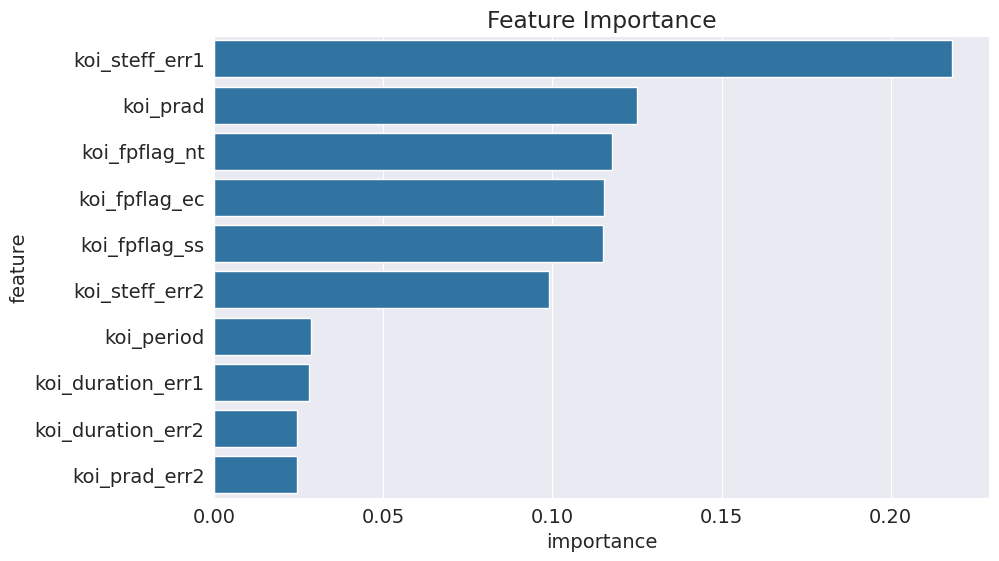

In [154]:
plt.title('Feature Importance')
sns.barplot(x='importance', y='feature', data=importance_df.head(10) )

In [155]:
model.score(X_train, train_targets)

0.9701199563794983

In [156]:
model.score(X_test, test_targets)

0.9587786259541985

In [157]:
#Now we will use the Stratified K-Fold Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [158]:
#kfold split returns the index of the split created
for train_index, test_index in kf.split(exo_df[input_cols], exo_df[target_col]):
  print(train_index, test_index)

[   0    1    2 ... 6546 6547 6549] [   8   11   15 ... 6536 6540 6548]
[   0    1    2 ... 6546 6547 6548] [  10   14   21 ... 6541 6544 6549]
[   0    1    3 ... 6547 6548 6549] [   2    7    9 ... 6530 6532 6545]
[   1    2    4 ... 6545 6548 6549] [   0    3    6 ... 6543 6546 6547]
[   0    2    3 ... 6547 6548 6549] [   1    4    5 ... 6537 6538 6539]


In [159]:
def get_score(model, X_train, X_test, train_targets, test_targets):
  model.fit(X_train, train_targets)
  return model.score(X_test, test_targets)

def get_roc_auc(model, X_train, X_test, train_targets, test_targets):
  model.fit(X_train, train_targets)
  test_probs = model.predict_proba(X_test)[:, 1]
  return roc_auc_score(test_targets, test_probs)

score_stratified = []
roc_auc_stratified = []

#Random Forest Classifier
for train_index, test_index in kf.split(exo_df[input_cols], exo_df[target_col]):
  train_df, test_df = exo_df.loc[train_index], exo_df.loc[test_index]

  train_inputs, test_inputs = train_df[input_cols], test_df[input_cols]
  train_targets, test_targets = train_df[target_col], test_df[target_col]
  #training and getting scores on the folds
  score_stratified.append(get_score(RandomForestClassifier(n_estimators=150, max_depth=5, criterion='gini', max_features=0.8, n_jobs= -1, random_state=32), train_inputs, test_inputs, train_targets, test_targets))
  roc_auc_stratified.append(get_roc_auc(RandomForestClassifier(n_estimators=150, max_depth=5, criterion='gini', max_features=0.8, n_jobs= -1, random_state=32), train_inputs, test_inputs, train_targets, test_targets))
print('Training on Random Forest Classifier')
print('Model score:', np.mean(score_stratified))
print('Model roc_auc:', np.mean(roc_auc_stratified))
print(score_stratified)
print(roc_auc_stratified)

Training on Random Forest Classifier
Model score: 0.9519083969465649
Model roc_auc: 0.9889361925358751
[0.9450381679389313, 0.9587786259541985, 0.9572519083969465, 0.9496183206106871, 0.9488549618320611]
[0.9881438171224395, 0.9902916320574272, 0.9889948968835174, 0.9871952164315778, 0.9900554001844131]


In [160]:
#XGBoost Classifier
from xgboost import XGBClassifier

score_stratified = []
roc_auc_stratified = []

for train_index, test_index in kf.split(exo_df[input_cols], exo_df[target_col]):
  train_df, test_df = exo_df.loc[train_index], exo_df.loc[test_index]

  train_inputs, test_inputs = train_df[input_cols], test_df[input_cols]
  train_targets, test_targets = train_df[target_col], test_df[target_col]
  #training and getting scores on the folds
  score_stratified.append(get_score(XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42), train_inputs, test_inputs, train_targets, test_targets))
  roc_auc_stratified.append(get_roc_auc(XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42), train_inputs, test_inputs, train_targets, test_targets))
print('Training on XGBoost Classifier')
print('Model score:', np.mean(score_stratified))
print('Model roc_auc:', np.mean(roc_auc_stratified))
print(score_stratified)
print(roc_auc_stratified)

Training on XGBoost Classifier
Model score: 0.9691603053435115
Model roc_auc: 0.9945410304667732
[0.9702290076335878, 0.9725190839694656, 0.9679389312977099, 0.9625954198473282, 0.9725190839694656]
[0.9932344641370769, 0.996580988160465, 0.9955623969660715, 0.992247530360876, 0.9950797727093764]


In [161]:
#Logistic Regression
score_stratified = []
roc_auc_stratified = []

for train_index, test_index in kf.split(exo_df[input_cols], exo_df[target_col]):
  train_df, test_df = exo_df.loc[train_index], exo_df.loc[test_index]

  train_inputs, test_inputs = train_df[input_cols], test_df[input_cols]
  train_targets, test_targets = train_df[target_col], test_df[target_col]
  #training and getting scores on the folds
  score_stratified.append(get_score(LogisticRegression(max_iter=1000, C=1, class_weight='balanced', random_state=32, solver='liblinear'), train_inputs, test_inputs, train_targets, test_targets))
  roc_auc_stratified.append(get_roc_auc(LogisticRegression(max_iter=1000, C=1, class_weight='balanced', random_state=32, solver='liblinear'), train_inputs, test_inputs, train_targets, test_targets))
print('Training on Logistic Regression')
print('Model score:', np.mean(score_stratified))
print('Model roc_auc:', np.mean(roc_auc_stratified))
print(score_stratified)
print(roc_auc_stratified)

Training on Logistic Regression
Model score: 0.8619847328244274
Model roc_auc: 0.9453573112600842
[0.8473282442748091, 0.8633587786259542, 0.8641221374045801, 0.8656488549618321, 0.8694656488549618]
[0.9385112775849118, 0.9468478285718641, 0.9443889849903856, 0.947510801892903, 0.9495276632603554]


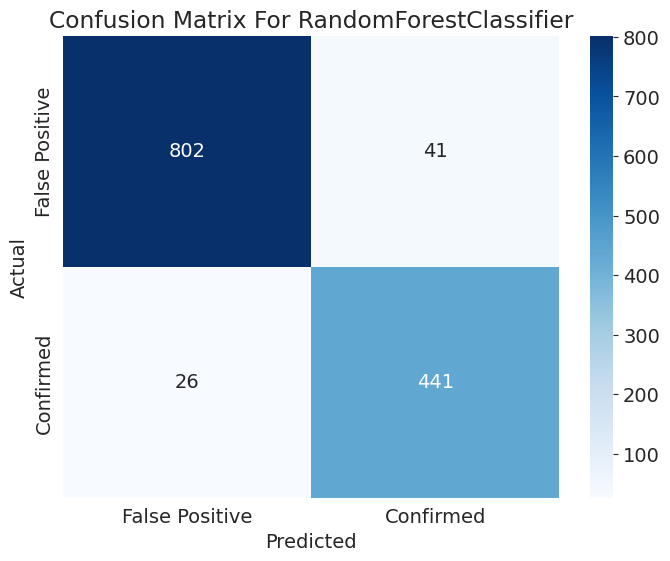

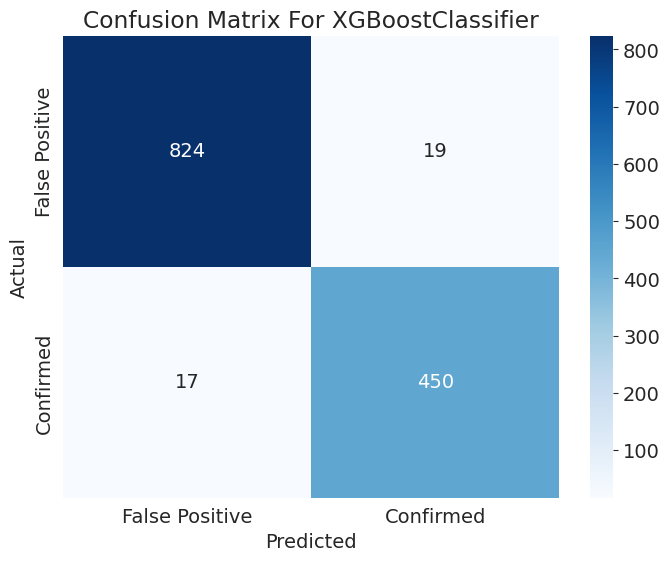

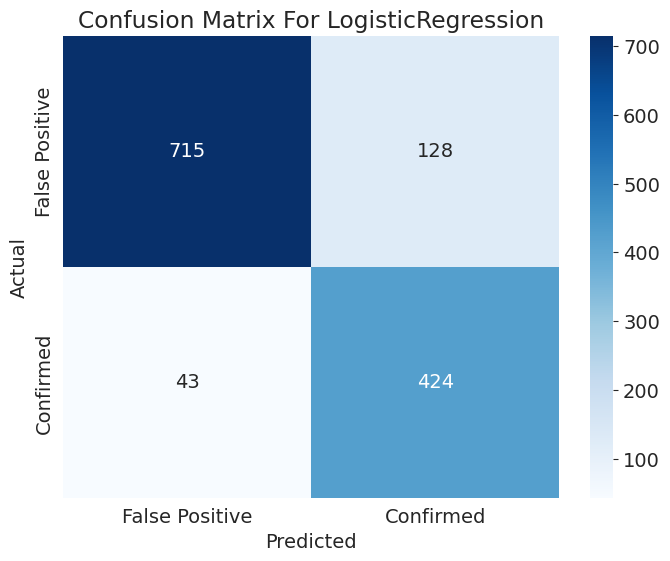

In [162]:
#Now we will build Confusion matrix for all the models
model = RandomForestClassifier(n_estimators=150, max_depth=5, criterion='gini', max_features=0.8, n_jobs= -1, random_state=32).fit(train_df[input_cols], train_df[target_col])
test_preds_RFC = model.predict(test_df[input_cols])
cm = confusion_matrix(test_df[target_col], test_preds_RFC)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False Positive', 'Confirmed'], yticklabels=['False Positive', 'Confirmed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For RandomForestClassifier')
plt.show()

model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42).fit(train_df[input_cols], train_df[target_col])
test_preds_XGB = model.predict(test_df[input_cols])
cm = confusion_matrix(test_df[target_col], test_preds_XGB)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False Positive', 'Confirmed'], yticklabels=['False Positive', 'Confirmed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For XGBoostClassifier')
plt.show()

model = LogisticRegression(max_iter=1000, C=1, class_weight='balanced', random_state=32, solver='liblinear').fit(train_df[input_cols], train_df[target_col])
test_preds_XGB = model.predict(test_df[input_cols])
cm = confusion_matrix(test_df[target_col], test_preds_XGB)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False Positive', 'Confirmed'], yticklabels=['False Positive', 'Confirmed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For LogisticRegression')
plt.show()